<a target="_blank" href="https://colab.research.google.com/github/skojaku/adv-net-sci/blob/main/notebooks/exercise-m04-friendship-paradox.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Degree distribution

![](https://barabasi.com/img/6/159.png)

Understanding degree distribution is the first key step to understand networks! And often, we want to see how the degree distribution looks like by plotting it like using histogram. But, it is not as easy as it may seem...

## Visualization basics

To learn the basics of data visualization, please take a [pen and paper exercise](pen-and-paper-friendship-paradox/main.pdf).

## Coding exercise

[Exercise: Plotting degree distribution](https://github.com/skojaku/adv-net-sci/blob/main/notebooks/exercise-m04-friendship-paradox.ipynb)



### Plotting degree distribution

(The following content includes the answer to the exercise. So please do the exercise first before reading the following content.)

We will first introduce a formal definition of the degree distribution. Then, we will learn how to plot the degree distribution of a network.

The degree of a node $i$, denoted by $d_i$, is the number of edges connected to it. With the adjacency matrix $A$, the degree of node $i$ is given by:

$$
k_i = \sum_{j=1}^N A_{ij}.
$$

Let us compute the degree distribution of a network. We will create a Barabási-Albert network with $N=10,000$ nodes and $m=1$ edge per node.

In [1]:
import igraph
g = igraph.Graph.Barabasi(n = 10000, m = 1) # Create a Barabási-Albert network
A = g.get_adjacency() # Get the adjacency matrix

Compute the degree of each node by summing the elements of the adjacency matrix along the rows.

In [2]:
import numpy as np
deg = np.sum(A, axis=1)
deg = deg.flatten()

The degree distribution $p(k)$ can be computed by counting the number of nodes with each degree and dividing by the total number of nodes.

In [3]:
p_deg = np.bincount(deg) / len(deg)

Let us plot the degree distribution. This is not as trivial as you might think... 🤔

Text(0, 0.5, 'Probability')

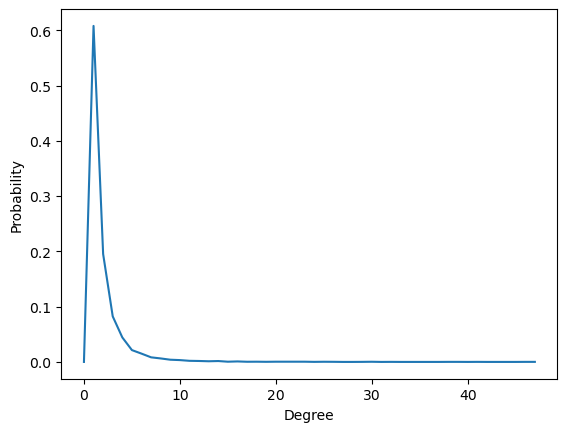

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x=np.arange(len(p_deg)), y=p_deg)
ax.set_xlabel('Degree')
ax.set_ylabel('Probability')

While it clearly shows that most nodes have small degree, it does not show the tail of the distribution clearly, and often it is this tail that is of great interest (e.g., hub nodes). To show the tail of the distribution more clearly, we can use a log-log plot.

Text(0, 0.5, 'Probability')

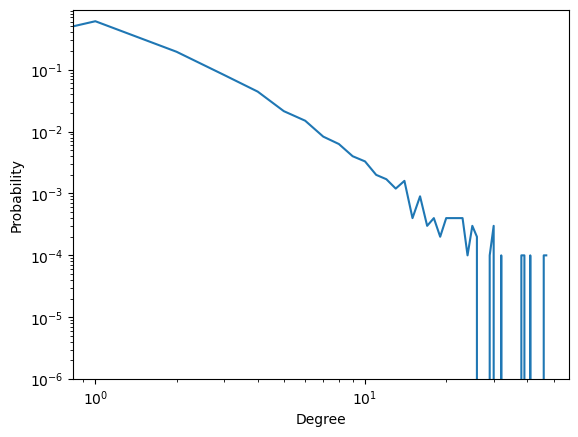

In [5]:
ax = sns.lineplot(x=np.arange(len(p_deg)), y=p_deg)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(np.min(p_deg[p_deg>0])*0.01, None)
ax.set_xlabel('Degree')
ax.set_ylabel('Probability')

We see fluctuations for large degree nodes because of the small number of nodes with large degree.
One can use "binning" to smooth the plot. Binning involves grouping the data into bins and calculating the fraction of data within each bin. However, selecting an appropriate bin size can be challenging, and even with a well-chosen bin size, some information may be lost.

A more convenient way is to use the complementary cumulative distribution function (CCDF).
The CCDF at degree $k$ is the probability that a randomly chosen node has degree $k'$ greater than $k$ ($k' > k$).  For a visual comparison of CCDF and PDF, see Figure 3 in {footcite}`newman2005power` or [the arxiv version](https://arxiv.org/pdf/cond-mat/0412004)

$$
\text{CCDF}(k) = P(k' > k) = \sum_{k'=k+1}^\infty p(k')
$$

- CCDF is a monotonically decreasing function of $k$.
- CCDF encompasses the full information of $p(k)$, i.e., taking the derivative of CCDF gives $p(k)$.
- CCDF can be plotted as a smooth curve on a log-log scale without binning.

Text(0, 0.5, 'CCDF')

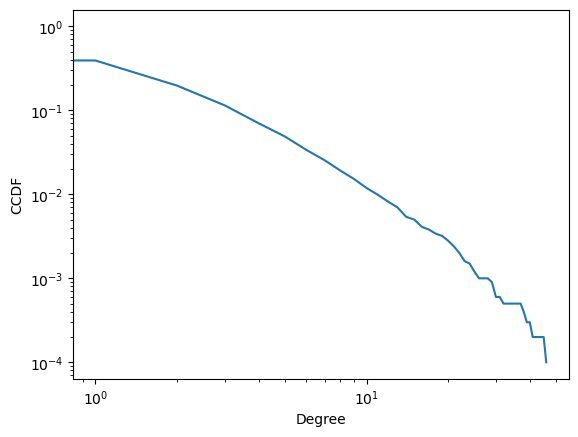

In [6]:
ccdf_deg = 1 - np.cumsum(p_deg)[:-1] # 1 - CDF (cumulative distribution function).
# The last element is excluded because it is always 1, resulting in CCDF=0, which cannot be plotted on a log-log scale.

ax = sns.lineplot(x=np.arange(len(ccdf_deg)), y=ccdf_deg)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('CCDF')

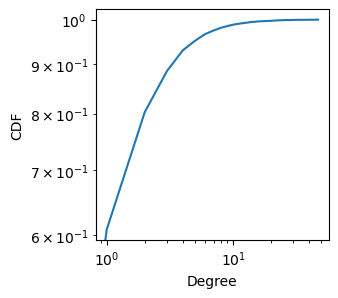

In [7]:
from myst_nb import glue

cdf_deg = np.cumsum(p_deg)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.lineplot(x=np.arange(len(cdf_deg)), y=cdf_deg, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('CDF')
glue("cdf_fig", fig, display=False)

:::{note}
CCDF (complementary cumulative distribution function) is used instead of CDF (cumulative distribution function) because it highlights the tail of the distribution better in a log-log plot. A log scale expands small values and compresses large values. In a CDF, large degree nodes have values close to 1, compressing the tail. In a CCDF, large degree nodes have small values, making the tail more visible.
```{glue} cdf_fig
:align: center
```
:::

The slope of the CCDF tells us the heterogeneity of the degree distribution.
- Steep slope: more **homogeneous** degree distribution (similar degrees)
- Flat slope: more **heterogeneous** degree distribution (wide range of degrees)


The slope of the CCDF is related to the power-law exponent of the degree distribution.
A power-law degree distribution is described by *a continuous distribution* with the *density function* (not the probability mass) $p(d)$ given by {footcite}`clauset2009power`:

$$
p(k) = \frac{\gamma-1}{k_{\min}} \left( \frac{k}{k_{\min}} \right)^{-\gamma}
$$

where:
- $p(k)$ is the probability *density* of a node having degree $k$
- $\gamma$ is the power-law exponent
- $k_{\min}$ is the minimum degree


:::{note}
The degree distribution is *discrete* but often approximated by a *continuous* distribution for mathematical convenience. While generally accurate, caution is needed as the reliability varies depending on the range of the degrees. See {footcite}`clauset2009power` for more details.
:::

:::{note}
The power-law distribution is ill-defined for $d=0$, which is why there must be a minimum degree $d_{\min}$ to avoid this issue.
:::

:::{note}
There has been a long-standing debate in network science as to whether the power-law well represents the real-world networks. Power-law is just one of many possible distributions with a heavy tail (i.e., a long tail on the right side of the distribution), and other distributions may also fit the data well such as log-normal distribution.
This discussion is critical as many theories in network science are built on the assumption of the form of the degree distribution. See {footcite}`artico2020rare,holme2019rare,voitalov2019scale,barabasi2003scale` for the debate.
:::

The CCDF for the power-law distribution is given by:

$$
\begin{aligned}
\text{CCDF}(k) &= 1 - \int_{k_{\min}}^k p(x) {\rm d}x \\
  &= 1 - \frac{\gamma -1}{k_{\min}}\cdot \frac{1}{1 - \gamma} \left[
\left(\frac{k^{-\gamma + 1}}{k_{\min}^{-\gamma}}\right) - \left(\frac{k_{\min} ^{-\gamma + 1}}{k_{\min} ^{-
\gamma}}\right)\right] \\
&= \left( \frac{k}{k_{\min}}\right)^{-\gamma + 1}
\end{aligned}
$$

Taking the logarithm:

$$
\log \left[ \text{CCDF}(k) \right] = (-\gamma + 1) \cdot \log k + \text{const.}
$$

Thus, the slope of the CCDF in a log-log plot is related to the power-law exponent $\gamma$.
Specifically, a steeper negative slope (i.e., a more negative value of $-\gamma + 1$) corresponds to a larger $\gamma$.
A larger $\gamma$ indicates a more homogeneous degree distribution, where the probability of finding nodes with very high degrees decreases more rapidly.
Conversely, a flatter slope (i.e., a value of $-\gamma + 1$ being closer to zero) corresponds to a smaller $\gamma$.
A smaller $\gamma$ indicates a more heterogeneous degree distribution, where there's a high probability of finding nodes with high degrees compared to that with a large $\gamma$ value.

For students interested in real-world examples of the CCDF plot, refer to Figure 4 in {footcite}`newman2005power`, or [the arxiv version](https://arxiv.org/pdf/cond-mat/0412004)

In sum, the CCDF in a log-log plot provides a convenient visual summary of the degree distribution, with the slope of the CCDF providing a measure of the heterogeneity of the degree distribution.


## Degree distribution of a friend

Continuing from the previous page, we will now consider the degree distribution of a friend of a node.

There are two ways to sample a friend of a node.
1. Sample a node uniformly at random and then sample a friend of the node.
2. Sample a *friendship* (i.e., edge) uniformly at random and then sample an end node of the edge.

Let us focus on the second case and leave the first case for interested students as an exercise.
In the second case, we sample an edge from the network.
This sampling is biased towards nodes with many edges, i.e., a person with $d$ edges is $d$ times more likely to be sampled than someone with 1 edge.
Thus, the degree distribution $p'(k)$ of a friend is given by

$$
p' (k) = C \cdot k \cdot p(k)
$$
The additional term $k$ reflects the fact that a person with $k$ friends is $k$ times more likely to be sampled than someone with 1 friend.
Term $C$ is the normalization constant that ensures the sum of probabilities $p'(k)$ over all $k$ is 1, which can be easily computed as follows:

$$
C = \frac{1}{\sum_{k} k \cdot p(k)} = \frac{1}{\langle k \rangle}
$$

where $\langle k \rangle$ is the average degree of the network. Substituting $C$ into $p'(k)$, we get:

$$
p' (k) = \frac{k}{\langle k \rangle} p(k)
$$

This is the degree distribution of a friend, and it is easy to verify that the average degree of a friend is given by

$$
\langle k' \rangle = \sum_{k} k \cdot p'(k) = \sum_{k} k \cdot \frac{k}{\langle k \rangle} p(k) = \frac{\langle k^2 \rangle}{\langle k \rangle}
$$

which is always larger than $\langle k \rangle$:

$$
\langle k' \rangle = \frac{\langle k^2 \rangle}{\langle k \rangle} \geq \langle k \rangle
$$

with equality only if every node has the same degree. This is a proof of the friendship paradox 😉!


:::{note}
The distribution $p'(k)$ is related to *the excess degree distribution* given by

$$
q(k) = \frac{k + 1}{\langle k \rangle} p(k+1)
$$

The term *excess* comes from the fact that the distribution represents the number of additional connections a randomly chosen friend has, beyond the connection that led to their selection. It excludes the link to the focal node and focuses on the remaining connections of the selected friend.
:::

:::{note}

The friend's degree, $\frac{\langle k^2 \rangle}{\langle k \rangle}$, concides with a term in Molloy-Reed condition:

$$

\frac{\langle k^2 \rangle}{\langle k \rangle} >2

$$

which is a condition for the existence of a giant component in a network. The Molloy-Reed condition states that the average degree of a node's friends must be at least 2 (the inequality is strict because the transition from a small component to a giant component is discontinuous). If a friend has only one edge, you and your friend form an isolated component. If a friend has two edges on average, your friend is a friend of someone else, and that someone else is also friend of another someone else and so on, forming a giant component.

:::

## Plotting degree distribution of a friend

Let us compare the degree distribution of a node and its friend.
We first get the edges in the network, from which we sample a friend.

In [8]:
from scipy import sparse
src, trg, _ = sparse.find(A)

- `sparse.find(A)` returns the source node, target node, and edge weight of the edge.
- `src` is the source node of the edge
- `trg` is the target node of the edge
- `_` is used to ignore the edge weight values, as we only need the source and target nodes for this analysis.

Now, let us get the degree of each friend

In [9]:
deg_friend = deg[src]
p_deg_friend = np.bincount(deg_friend) / len(deg_friend)

The CCDF of the degree distributions of a node and a friend can be computed by:

In [10]:
ccdf_deg = 1 - np.cumsum(p_deg)[:-1]
ccdf_deg_friend = 1 - np.cumsum(p_deg_friend)[:-1]

and plotted by:

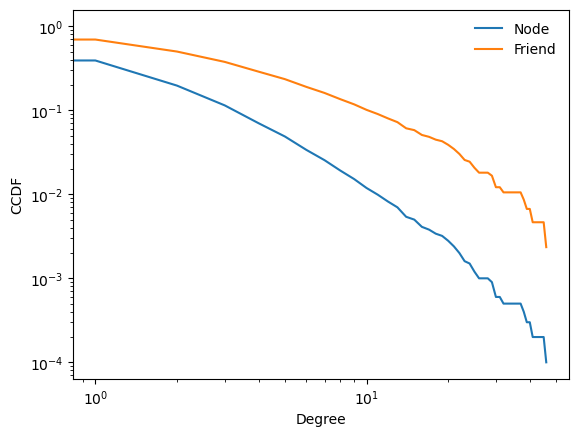

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.lineplot(x=np.arange(len(ccdf_deg)), y=ccdf_deg, label='Node')
ax = sns.lineplot(x=np.arange(len(ccdf_deg)), y=ccdf_deg_friend, label='Friend', ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('CCDF')
ax.legend(frameon = False)

The slope of the CCDF of a friend is flatter than that of a node, indicating that the degree distribution of a friend is biased towards higher degrees.

```{footbibliography}
```